In [2]:
# First, install the xgboost package
!pip install xgboost

# Then import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier  # This will work after installation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    average_precision_score,
    precision_score,
    recall_score,
    f1_score,
)
import warnings

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use("ggplot")
np.set_printoptions(precision=4, suppress=True)
pd.set_option('display.float_format', '{:.4f}'.format)
warnings.filterwarnings("ignore")

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   - -------------------------------------- 2.1/72.0 MB 11.0 MB/s eta 0:00:07
   -- ------------------------------------- 3.9/72.0 MB 10.1 MB/s eta 0:00:07
   -- ------------------------------------- 5.0/72.0 MB 7.9 MB/s eta 0:00:09
   --- ------------------------------------ 6.0/72.0 MB 7.1 MB/s eta 0:00:10
   --- ------------------------------------ 7.1/72.0 MB 6.8 MB/s eta 0:00:10
   ---- ----------------------------------- 8.4/72.0 MB 6.6 MB/s eta 0:00:10
   ----- ---------------------------------- 9.4/72.0 MB 6.5 MB/s eta 0:00:10
   ----- ---------------------------------- 10.5/72.0 MB 6.2 MB/s eta 0:00:10
   ------ --------------------------------- 11.3/72.0 MB 6.0 MB/s eta 0:00:11
   ------ --------------------------------- 12.3/72.0 MB 5.9 MB/s eta 0:00:11
   ------- -------------------------------- 13.6/72.0 MB 5.9 MB/s eta 0:00:10
   -------- ------------------------------- 14.7/72.0 MB 5.9 MB/s eta 0:00:10

In [3]:
import os

if os.path.exists("creditcard.csv"):
    data_path = "creditcard.csv"
    print("Running on Kaggle environment")
else:
    data_path = "creditcard.csv"
    print("Running locally")

print(f"Loading data from: {data_path}\n")
df = pd.read_csv(data_path)

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head())

print("\nBasic Statistics:")
display(df.describe())

# Check for missing values
print("Missing Values:")
display(df.isnull().sum())

print("\nDataset Info:")
display(df.info())

Running on Kaggle environment
Loading data from: creditcard.csv

Dataset Shape: (284807, 31)

First few rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0



Basic Statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,...,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000,284807.0000
mean,94813.8596,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,...,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,88.3496,0.0017
std,47488.1460,1.9587,1.6513,1.5163,1.4159,1.3802,1.3323,1.2371,1.1944,1.0986,...,0.7345,0.7257,0.6245,0.6056,0.5213,0.4822,0.4036,0.3301,250.1201,0.0415
min,0.0000,-56.4075,-72.7157,-48.3256,-5.6832,-113.7433,-26.1605,-43.5572,-73.2167,-13.4341,...,-34.8304,-10.9331,-44.8077,-2.8366,-10.2954,-2.6046,-22.5657,-15.4301,0.0000,0.0000
25%,54201.5000,-0.9204,-0.5985,-0.8904,-0.8486,-0.6916,-0.7683,-0.5541,-0.2086,-0.6431,...,-0.2284,-0.5424,-0.1618,-0.3546,-0.3171,-0.3270,-0.0708,-0.0530,5.6000,0.0000
50%,84692.0000,0.0181,0.0655,0.1798,-0.0198,-0.0543,-0.2742,0.0401,0.0224,-0.0514,...,-0.0295,0.0068,-0.0112,0.0410,0.0166,-0.0521,0.0013,0.0112,22.0000,0.0000
75%,139320.5000,1.3156,0.8037,1.0272,0.7433,0.6119,0.3986,0.5704,0.3273,0.5971,...,0.1864,0.5286,0.1476,0.4395,0.3507,0.2410,0.0910,0.0783,77.1650,0.0000
max,172792.0000,2.4549,22.0577,9.3826,16.8753,34.8017,73.3016,120.5895,20.0072,15.5950,...,27.2028,10.5031,22.5284,4.5845,7.5196,3.5173,31.6122,33.8478,25691.1600,1.0000


Missing Values:


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


None

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Fraud Percentage: 0.173%


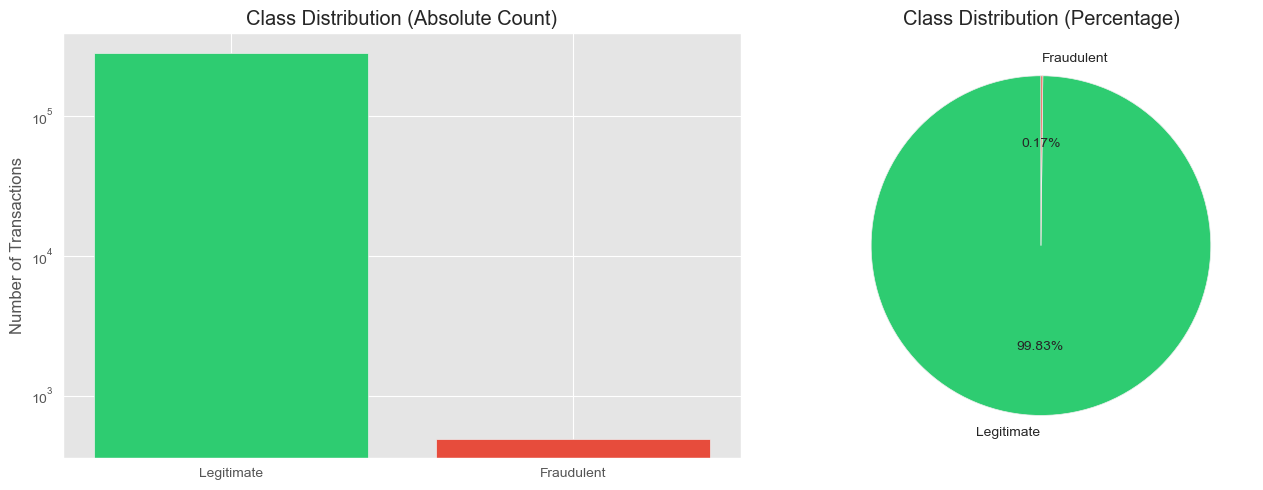

In [4]:
class_counts = df["Class"].value_counts()
print("Class Distribution:")
print(class_counts)
print(f"\nFraud Percentage: {100 * class_counts[1] / len(df):.3f}%")

# Visualize class imbalance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(['Legitimate', 'Fraudulent'], class_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_ylabel('Number of Transactions')
axes[0].set_title('Class Distribution (Absolute Count)')
axes[0].set_yscale('log')  # Log scale to see both classes

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(class_counts.values, labels=['Legitimate', 'Fraudulent'], 
            autopct='%1.2f%%', colors=colors, startangle=90)
axes[1].set_title('Class Distribution (Percentage)')

plt.tight_layout()
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

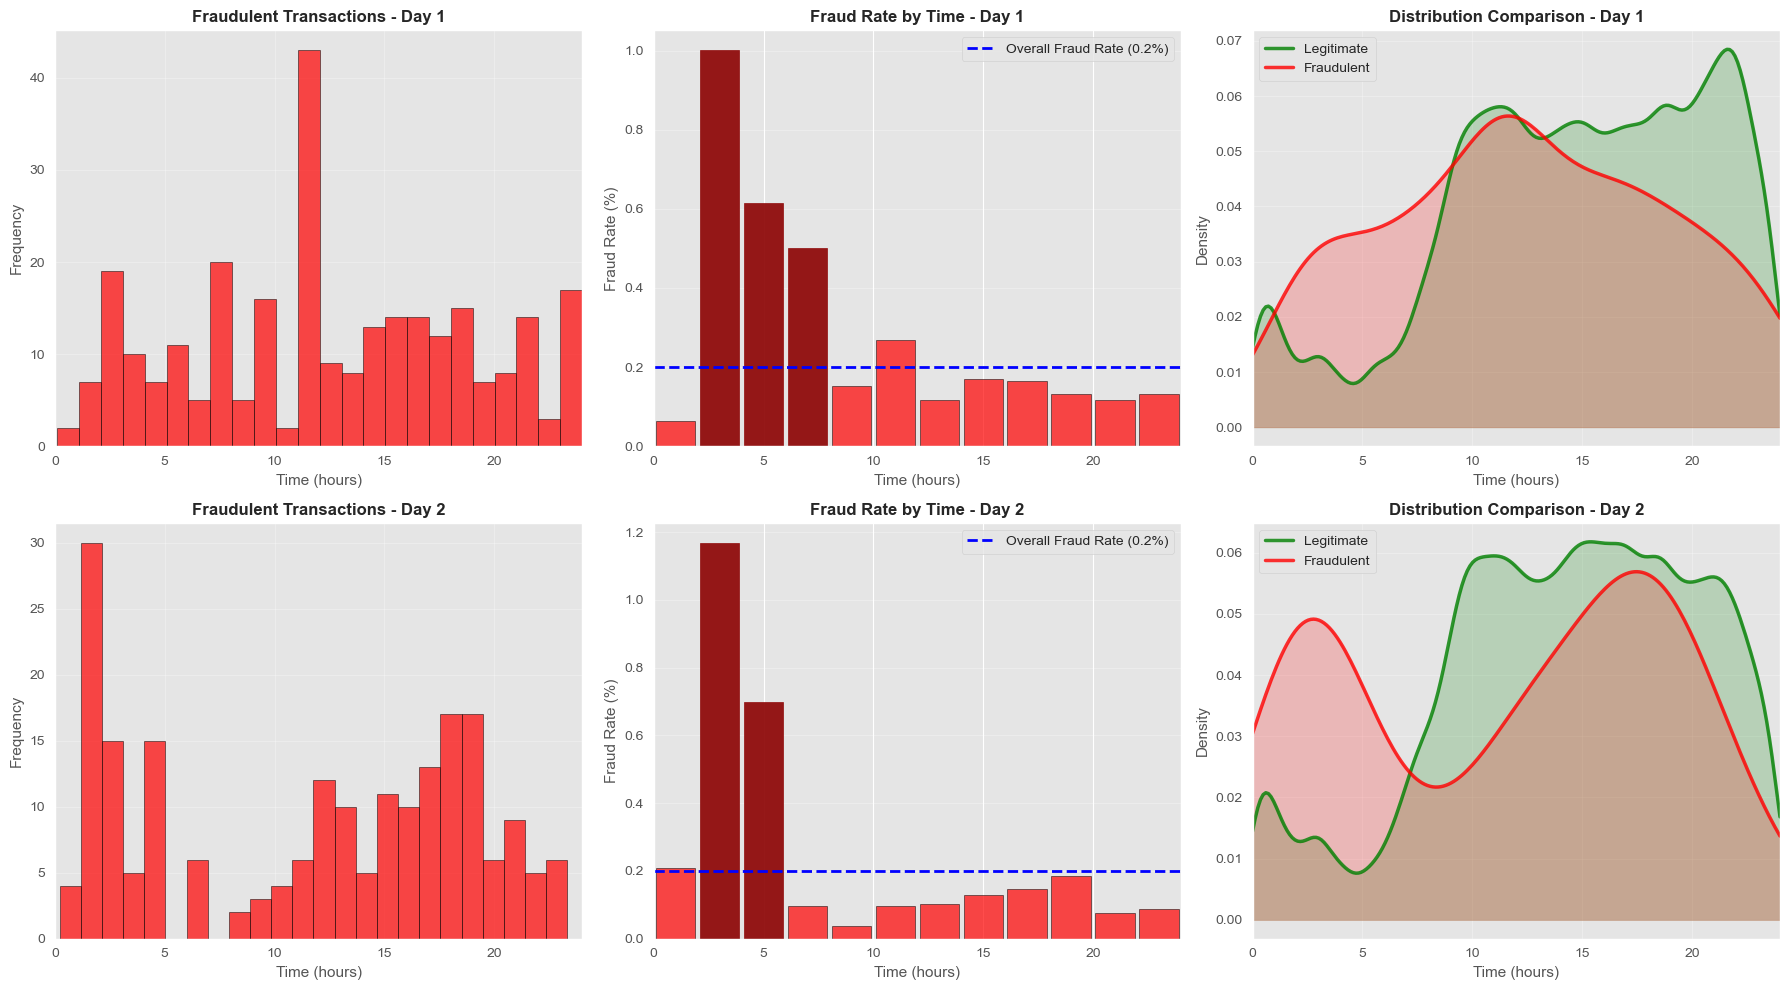

In [5]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

day1_mask = df["Time"] / 3600 < 24
day2_mask = df["Time"] / 3600 >= 24

day1_fraud = df[(df["Class"] == 1) & day1_mask]["Time"] / 3600
day2_fraud = (df[(df["Class"] == 1) & day2_mask]["Time"] / 3600) - 24  

day1_legit = df[(df["Class"] == 0) & day1_mask]["Time"] / 3600
day2_legit = (df[(df["Class"] == 0) & day2_mask]["Time"] / 3600) - 24


# ============= DAY 1 (Top Row) =============

# Plot 1: Day 1 Fraudulent transaction volume
axes[0, 0].hist(day1_fraud, bins=24, alpha=0.7, color="red", edgecolor="black")
axes[0, 0].set_xlabel("Time (hours)", fontsize=11)
axes[0, 0].set_ylabel("Frequency", fontsize=11)
axes[0, 0].set_title("Fraudulent Transactions - Day 1", fontsize=12, fontweight="bold")
axes[0, 0].set_xlim(0, 24)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Day 1 Fraud rate by time
time_bins_day = np.linspace(0, 24, 13)  # 12 bins of 2 hours each
legit_counts_d1, _ = np.histogram(day1_legit, bins=time_bins_day)
fraud_counts_d1, _ = np.histogram(day1_fraud, bins=time_bins_day)
fraud_rate_d1 = fraud_counts_d1 / (legit_counts_d1 + fraud_counts_d1 + 1e-10) * 100
bin_centers_day = (time_bins_day[:-1] + time_bins_day[1:]) / 2

bars_d1 = axes[0, 1].bar(
    bin_centers_day, fraud_rate_d1, width=1.8, color="red", alpha=0.7, edgecolor="black"
)
axes[0, 1].axhline(
    y=0.2, color="blue", linestyle="--", linewidth=2, label="Overall Fraud Rate (0.2%)"
)

# Highlight high-risk periods
for i, rate in enumerate(fraud_rate_d1):
    if rate > 0.5:
        bars_d1[i].set_color("darkred")
        bars_d1[i].set_alpha(0.9)

axes[0, 1].set_xlabel("Time (hours)", fontsize=11)
axes[0, 1].set_ylabel("Fraud Rate (%)", fontsize=11)
axes[0, 1].set_title("Fraud Rate by Time - Day 1", fontsize=12, fontweight="bold")
axes[0, 1].set_xlim(0, 24)
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3, axis="y")

# Plot 3: Day 1 KDE
from scipy import stats

legit_kde_d1 = stats.gaussian_kde(day1_legit)
fraud_kde_d1 = stats.gaussian_kde(day1_fraud)
time_range_day = np.linspace(0, 24, 200)

axes[0, 2].plot(
    time_range_day,
    legit_kde_d1(time_range_day),
    color="green",
    linewidth=2.5,
    label="Legitimate",
    alpha=0.8,
)
axes[0, 2].plot(
    time_range_day,
    fraud_kde_d1(time_range_day),
    color="red",
    linewidth=2.5,
    label="Fraudulent",
    alpha=0.8,
)
axes[0, 2].fill_between(
    time_range_day, legit_kde_d1(time_range_day), alpha=0.2, color="green"
)
axes[0, 2].fill_between(
    time_range_day, fraud_kde_d1(time_range_day), alpha=0.2, color="red"
)
axes[0, 2].set_xlabel("Time (hours)", fontsize=11)
axes[0, 2].set_ylabel("Density", fontsize=11)
axes[0, 2].set_title("Distribution Comparison - Day 1", fontsize=12, fontweight="bold")
axes[0, 2].set_xlim(0, 24)
axes[0, 2].legend(fontsize=10)
axes[0, 2].grid(True, alpha=0.3)

# ============= DAY 2 (Bottom Row) =============

# Plot 4: Day 2 Fraudulent transaction volume
axes[1, 0].hist(day2_fraud, bins=24, alpha=0.7, color="red", edgecolor="black")
axes[1, 0].set_xlabel("Time (hours)", fontsize=11)
axes[1, 0].set_ylabel("Frequency", fontsize=11)
axes[1, 0].set_title("Fraudulent Transactions - Day 2", fontsize=12, fontweight="bold")
axes[1, 0].set_xlim(0, 24)
axes[1, 0].grid(True, alpha=0.3)

# Plot 5: Day 2 Fraud rate by time
legit_counts_d2, _ = np.histogram(day2_legit, bins=time_bins_day)
fraud_counts_d2, _ = np.histogram(day2_fraud, bins=time_bins_day)
fraud_rate_d2 = fraud_counts_d2 / (legit_counts_d2 + fraud_counts_d2 + 1e-10) * 100

bars_d2 = axes[1, 1].bar(
    bin_centers_day, fraud_rate_d2, width=1.8, color="red", alpha=0.7, edgecolor="black"
)
axes[1, 1].axhline(
    y=0.2, color="blue", linestyle="--", linewidth=2, label="Overall Fraud Rate (0.2%)"
)

# Highlight high-risk periods
for i, rate in enumerate(fraud_rate_d2):
    if rate > 0.5:
        bars_d2[i].set_color("darkred")
        bars_d2[i].set_alpha(0.9)

axes[1, 1].set_xlabel("Time (hours)", fontsize=11)
axes[1, 1].set_ylabel("Fraud Rate (%)", fontsize=11)
axes[1, 1].set_title("Fraud Rate by Time - Day 2", fontsize=12, fontweight="bold")
axes[1, 1].set_xlim(0, 24)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3, axis="y")

# Plot 6: Day 2 KDE
legit_kde_d2 = stats.gaussian_kde(day2_legit)
fraud_kde_d2 = stats.gaussian_kde(day2_fraud)

axes[1, 2].plot(
    time_range_day,
    legit_kde_d2(time_range_day),
    color="green",
    linewidth=2.5,
    label="Legitimate",
    alpha=0.8,
)
axes[1, 2].plot(
    time_range_day,
    fraud_kde_d2(time_range_day),
    color="red",
    linewidth=2.5,
    label="Fraudulent",
    alpha=0.8,
)
axes[1, 2].fill_between(
    time_range_day, legit_kde_d2(time_range_day), alpha=0.2, color="green"
)
axes[1, 2].fill_between(
    time_range_day, fraud_kde_d2(time_range_day), alpha=0.2, color="red"
)
axes[1, 2].set_xlabel("Time (hours)", fontsize=11)
axes[1, 2].set_ylabel("Density", fontsize=11)
axes[1, 2].set_title("Distribution Comparison - Day 2", fontsize=12, fontweight="bold")
axes[1, 2].set_xlim(0, 24)
axes[1, 2].legend(fontsize=10)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("temporal_analysis_by_day.png", dpi=300, bbox_inches="tight")
plt.show()

In [6]:
# DIVISION DE DATOS
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTest set class distribution:")
print(y_test.value_counts())

Training set size: 227845
Test set size: 56962

Training set class distribution:
Class
0    227451
1       394
Name: count, dtype: int64

Test set class distribution:
Class
0    56864
1       98
Name: count, dtype: int64


In [7]:
# SCALING

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier manipulation
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [8]:
# FUNCTION ABSTRACTION
import time


def evaluate_model(
    model,
    X_train,
    y_train,
    X_test,
    y_test,
    model_name,
    subtitle=None,
    verbose=False,
    show_confusion_matrix=True,
):
    """
    Train a model and generate comprehensive evaluation metrics and visualizations.

    Parameters:
    -----------
    model : sklearn estimator
        The machine learning model to train and evaluate
    X_train : array-like
        Training features
    y_train : array-like
        Training labels
    X_test : array-like
        Test features
    y_test : array-like
        Test labels
    model_name : str
        Name of the model for display purposes
    subtitle : str, optional
        Additional subtitle for the confusion matrix
    verbose : bool, optional
        Whether to print detailed output
    show_confusion_matrix : bool, optional
        Whether to display the confusion matrix plot

    Returns:
    --------
    dict : Dictionary containing predictions, probabilities, AUC score, and training time
    """
    # Print header
    header = f"{model_name}"

    if verbose:
        print("=" * len(header))
        print(header)
        print("=" * len(header))

    # Train model with timing
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    if training_time < 60:
        time_str = f"{training_time:.4f} seconds"
    elif training_time < 3600:
        minutes = int(training_time // 60)
        seconds = training_time % 60
        time_str = f"{minutes} minutes and {seconds:.2f} seconds"
    else:
        hours = int(training_time // 3600)
        remaining_seconds = training_time % 3600
        minutes = int(remaining_seconds // 60)
        seconds = remaining_seconds % 60
        time_str = f"{hours} hours, {minutes} minutes and {seconds:.2f} seconds"

    print(f"\nTraining Time: {time_str}")

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Classification Report
    if verbose:
        print("\nClassification Report:")
        print(
            classification_report(
                y_test,
                y_pred,
                target_names=["Fraudulenta", "Legitima"],
                labels=[1, 0],
            )
        )

    # ROC AUC Score
    auc_score = roc_auc_score(y_test, y_pred_proba)
    if verbose:
        print(f"\nROC AUC Score: {auc_score:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

    if show_confusion_matrix:
        # Plot Confusion Matrix
        plt.figure(figsize=(7, 5))
        ax = plt.gca()

        sns.heatmap(
            cm,
            annot=True,
            fmt="d",
            cmap="RdYlGn_r",
            xticklabels=["Fraudulenta", "Legitima"],
            yticklabels=["Fraudulenta", "Legitima"],
            cbar_kws={"label": "Count"},
            linewidths=2,
            linecolor="white",
            square=True,
            annot_kws={"size": 16, "weight": "bold"},
        )

        # Title with optional subtitle
        title = f"Confusion Matrix - {model_name}"
        if subtitle:
            title += f"\n{subtitle}"
        plt.title(title, fontweight="bold", fontsize=14, pad=20)

        plt.ylabel("Real (Actual)", fontweight="bold", fontsize=12)
        plt.xlabel("Predicción (Predicted)", fontweight="bold", fontsize=12)

        # Add TP, FN, FP, TN labels
        plt.text(
            0.5,
            0.25,
            "TP",
            ha="center",
            va="center",
            fontsize=14,
            color="white",
            weight="bold",
            bbox=dict(boxstyle="round,pad=0.5", facecolor="darkgreen", alpha=0.8),
        )
        plt.text(
            1.5,
            0.25,
            "FN",
            ha="center",
            va="center",
            fontsize=14,
            color="white",
            weight="bold",
            bbox=dict(boxstyle="round,pad=0.5", facecolor="darkred", alpha=0.8),
        )
        plt.text(
            0.5,
            1.25,
            "FP",
            ha="center",
            va="center",
            fontsize=14,
            color="white",
            weight="bold",
            bbox=dict(boxstyle="round,pad=0.5", facecolor="darkred", alpha=0.8),
        )
        plt.text(
            1.5,
            1.25,
            "TN",
            ha="center",
            va="center",
            fontsize=14,
            color="white",
            weight="bold",
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.8),
        )

        plt.tight_layout()
        plt.show()

    # Return results for further analysis
    return {
        "model": model,
        "predictions": y_pred,
        "probabilities": y_pred_proba,
        "auc_score": auc_score,
        "confusion_matrix": cm,
        "training_time": training_time,
    }


Training Time: 1.2598 seconds


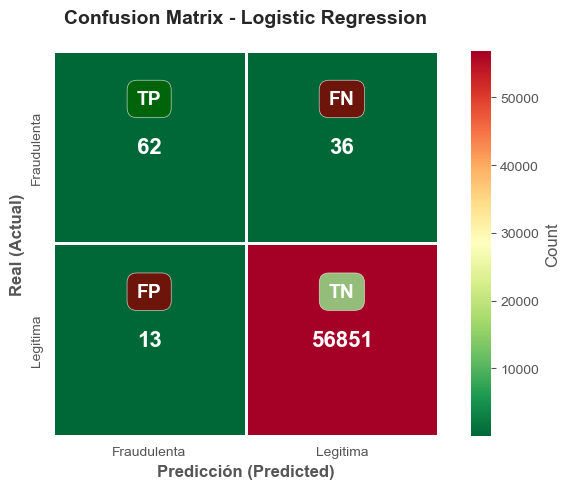

In [10]:
# Logistic Regression
lr_baseline = LogisticRegression(random_state=42, max_iter=1000)
results_lr = evaluate_model(
    model=lr_baseline,
    X_train=X_train_scaled,
    y_train=y_train,
    X_test=X_test_scaled,
    y_test=y_test,
    model_name="Logistic Regression",
    show_confusion_matrix=True
)


Training Time: 0.3812 seconds


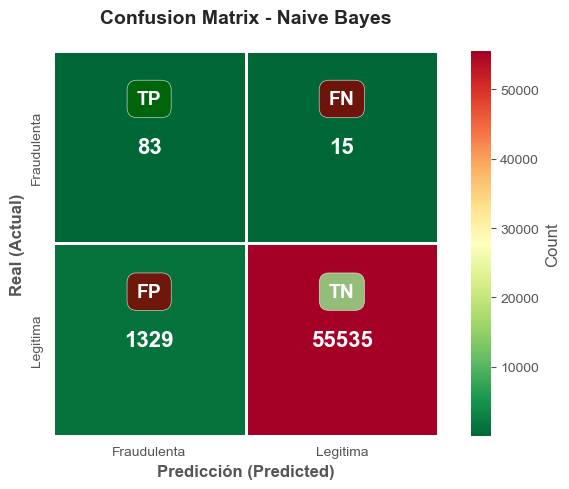

In [11]:
# Naive Bayes
nb = GaussianNB()
results_nb = evaluate_model(
    model=nb,
    X_train=X_train_scaled,
    y_train=y_train,
    X_test=X_test_scaled,
    y_test=y_test,
    model_name="Naive Bayes",
    show_confusion_matrix=True
)


Training Time: 2.0931 seconds


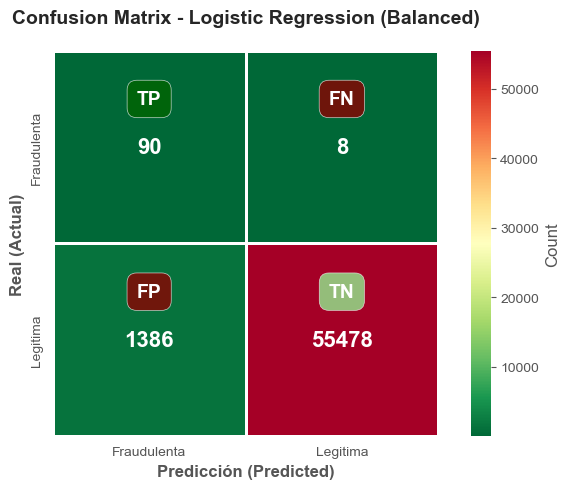

In [12]:
# LOGISTIC REGRESSION (BALANCED)
lr_balanced = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
results_lr_balanced = evaluate_model(
    model=lr_balanced,
    X_train=X_train_scaled,
    y_train=y_train,
    X_test=X_test_scaled,
    y_test=y_test,
    model_name="Logistic Regression (Balanced)",
    show_confusion_matrix=True
)


Undersampled training set size: 788
Class distribution after undersampling:
Class
0    394
1    394
Name: count, dtype: int64


Training Time: 0.0186 seconds


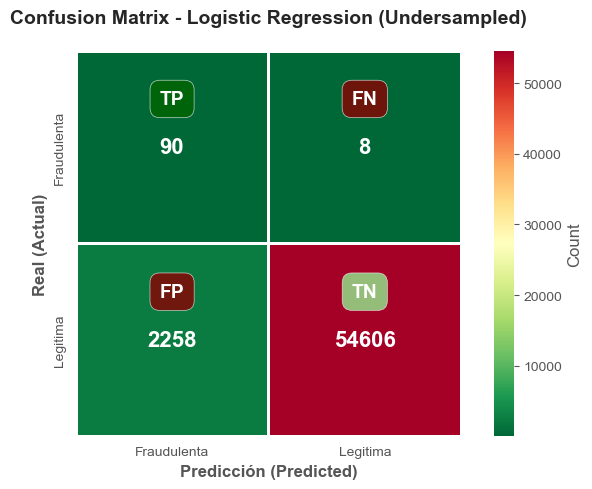

In [13]:
# Separate majority and minority classes
X_train_majority = X_train_scaled[y_train == 0]
X_train_minority = X_train_scaled[y_train == 1]
y_train_majority = y_train[y_train == 0]
y_train_minority = y_train[y_train == 1]

# Undersample majority class
np.random.seed(42)
indices = np.random.choice(
    X_train_majority.index, size=len(X_train_minority), replace=False
)
X_train_majority_undersampled = X_train_majority.loc[indices]
y_train_majority_undersampled = y_train_majority.loc[indices]

# Combine minority and undersampled majority
X_train_undersampled = pd.concat([X_train_majority_undersampled, X_train_minority])
y_train_undersampled = pd.concat([y_train_majority_undersampled, y_train_minority])

print(f"\nUndersampled training set size: {len(X_train_undersampled)}")
print(f"Class distribution after undersampling:")
print(y_train_undersampled.value_counts())
print()

lr_undersampled = LogisticRegression(random_state=42, max_iter=1000)

results_lr_undersampled = evaluate_model(
    model=lr_undersampled,
    X_train=X_train_undersampled,
    y_train=y_train_undersampled,
    X_test=X_test_scaled,
    y_test=y_test,
    model_name="Logistic Regression (Undersampled)",
    show_confusion_matrix=True
)


Training Time: 1 minutes and 19.83 seconds


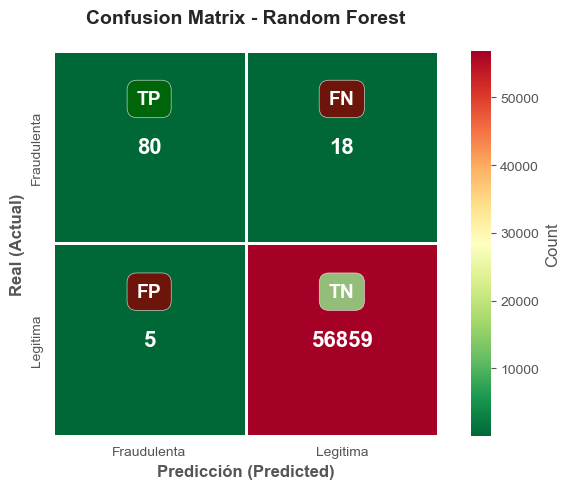

In [14]:
rf_default = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

results_rf_default = evaluate_model(
    model=rf_default,
    X_train=X_train_scaled,
    y_train=y_train,
    X_test=X_test_scaled,
    y_test=y_test,
    model_name="Random Forest",
    show_confusion_matrix=True
)

In [15]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_default.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
display(feature_importance.head(10))


Top 10 Most Important Features:


,feature,importance
17,V17,0.1703
14,V14,0.1364
12,V12,0.1333
10,V10,0.0741
16,V16,0.0718
11,V11,0.0453
9,V9,0.0311
4,V4,0.0305
18,V18,0.0282
7,V7,0.0246



Training Time: 39.4942 seconds


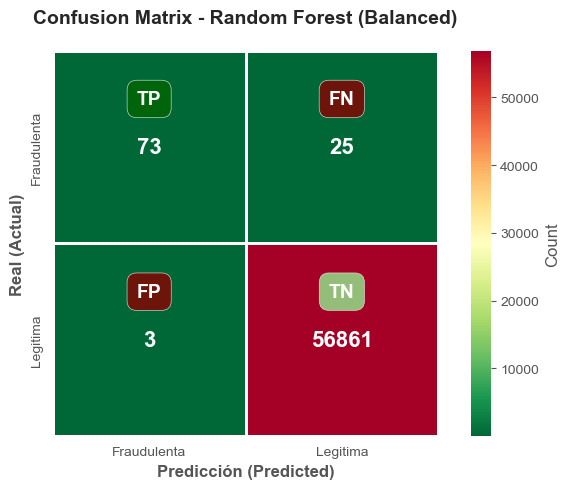

In [16]:
rf_balanced = RandomForestClassifier(
    n_estimators=100, 
    class_weight='balanced', 
    random_state=42, 
    n_jobs=-1
)

results_rf_balanced = evaluate_model(
    model=rf_balanced,
    X_train=X_train_scaled,
    y_train=y_train,
    X_test=X_test_scaled,
    y_test=y_test,
    model_name="Random Forest (Balanced)",
    show_confusion_matrix=True
)

In [ ]:
# Bagging
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        max_depth=10, 
        min_samples_split=20,
        min_samples_leaf=10,
    ),
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
)

results_bagging = evaluate_model(
    model=bagging,
    X_train=X_train_scaled,
    y_train=y_train,
    X_test=X_test_scaled,
    y_test=y_test,
    model_name="Bagging",
    show_confusion_matrix=True,
)

In [ ]:
# XGBoost with auto-balanced weights
xgboost = XGBClassifier(
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    max_depth=6,
    learning_rate=0.1,
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

results_xgboost = evaluate_model(
    model=xgboost,
    X_train=X_train_scaled,
    y_train=y_train,
    X_test=X_test_scaled,
    y_test=y_test,
    model_name="XGBoost",
    show_confusion_matrix=True
)

In [ ]:
models = {
    "Logistic Regression": {
        "y_pred": results_lr["predictions"],
        "probabilities": results_lr["probabilities"],
        "auc": results_lr["auc_score"],
        "confusion_matrix": results_lr["confusion_matrix"],
        "time": results_lr["training_time"]
    },
    "Naive Bayes": {
        "y_pred": results_nb["predictions"],
        "probabilities": results_nb["probabilities"],
        "auc": results_nb["auc_score"],
        "confusion_matrix": results_nb["confusion_matrix"],
        "time": results_nb["training_time"]
    },
    "Logistic Regression (Balanced)": {
        "y_pred": results_lr_balanced["predictions"],
        "probabilities": results_lr_balanced["probabilities"],
        "auc": results_lr_balanced["auc_score"],
        "confusion_matrix": results_lr_balanced["confusion_matrix"],
        "time": results_lr_balanced["training_time"]
    },
    "Logistic Regression (Undersampled)": {
        "y_pred": results_lr_undersampled["predictions"],
        "probabilities": results_lr_undersampled["probabilities"],
        "auc": results_lr_undersampled["auc_score"],
        "confusion_matrix": results_lr_undersampled["confusion_matrix"],
        "time": results_lr_undersampled["training_time"]
    },
    "Random Forest": {
        "y_pred": results_rf_default["predictions"],
        "probabilities": results_rf_default["probabilities"],
        "auc": results_rf_default["auc_score"],
        "confusion_matrix": results_rf_default["confusion_matrix"],
        "time": results_rf_default["training_time"]
    },
    "Random Forest (Balanced)": {
        "y_pred": results_rf_balanced["predictions"],
        "probabilities": results_rf_balanced["probabilities"],
        "auc": results_rf_balanced["auc_score"],
        "confusion_matrix": results_rf_balanced["confusion_matrix"],
        "time": results_rf_balanced["training_time"]
    },
    "Bagging Classifier": {
        "y_pred": results_bagging["predictions"],
        "probabilities": results_bagging["probabilities"],
        "auc": results_bagging["auc_score"],
        "confusion_matrix": results_bagging["confusion_matrix"],
        "time": results_bagging["training_time"]
    },
    "Gradient Boosting": {
        "y_pred": results_xgboost["predictions"],
        "probabilities": results_xgboost["probabilities"],
        "auc": results_xgboost["auc_score"],
        "confusion_matrix": results_xgboost["confusion_matrix"],
        "time": results_xgboost["training_time"]
    },
}


# Calculate metrics for all models
results_df = []
for name, result in models.items():
    precision = precision_score(y_test, result["y_pred"])
    recall = recall_score(y_test, result["y_pred"])
    f1 = f1_score(y_test, result["y_pred"])

    results_df.append(
        {
            "Model": name,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "Training Time": result["time"],
            "ROC-AUC": result["auc"]
        }
    )

results_df = pd.DataFrame(results_df)
print("\n" + "=" * 80)
print("MODEL COMPARISON SUMMARY")
print("=" * 80)
display(results_df)